In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import time
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

### Loading data

In [2]:
data = pd.read_csv("../dataset/dataset_3.csv", sep = ";").drop("Unnamed: 0", 1)
data.describe()

,TP_ESCOLA,TP_LINGUA,Escolaridade_Pai,Escolaridade_Mae,Ocupacao_Pai,Ocupacao_Mae,Renda_Mensal,Banheiros,Freezer,Computador,DESEMPENHO_BAIXO,Renda_per_capta,Pessoas_por_computador,Celulares_por_pessoa
count,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06
mean,4.491498e-01,5.271628e-01,3.439471e+00,4.073692e+00,2.296138e+00,2.226948e+00,3.496580e+00,1.369465e+00,3.874868e-01,6.882020e-01,5.000047e-01,8.346541e+02,1.819410e+00,4.273131e+01
std,6.148688e-01,4.992617e-01,1.873869e+00,1.719509e+00,1.392760e+00,1.279828e+00,3.254036e+00,7.059705e-01,5.448613e-01,7.721223e-01,5.000001e-01,1.252211e+03,1.986800e+00,9.523057e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.994000e+02,0.000000e+00,4.300000e+01
50%,0.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,4.990000e+02,1.333333e+00,4.600000e+01
75%,1.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.316667e+02,3.000000e+00,4.900000e+01
max,2.000000e+00,1.000000e+00,7.000000e+00,7.000000e+00,5.000000e+00,5.000000e+00,1.600000e+01,4.000000e+00,4.000000e+00,4.000000e+00,1.000000e+00,3.000000e+04,2.000000e+01,5.400000e+01


### Spliting train and test data

In [3]:
train, test = train_test_split(data, test_size=0.30)

## XGBoost

Precision: 0.7007615681571944
Recall: 0.7521508147742934


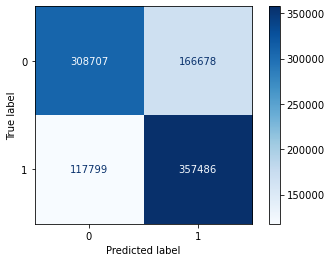

In [4]:
model = xgb.XGBClassifier(n_jobs = -1).fit(train.drop(["DESEMPENHO_BAIXO"], 1), train["DESEMPENHO_BAIXO"])
predictions = model.predict(test.drop(["DESEMPENHO_BAIXO"], 1))
precision = precision_score(test["DESEMPENHO_BAIXO"] , predictions, average = "micro")
recall = recall_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary")
print("Precision: " + str(precision))
print("Recall: " + str(recall))
plot_confusion_matrix(model, test.drop(["DESEMPENHO_BAIXO"], 1), test["DESEMPENHO_BAIXO"], cmap = plt.cm.Blues)

## Decision Tree Classifier

Precision: 0.6417684369970652
Recall: 0.6558654281115541


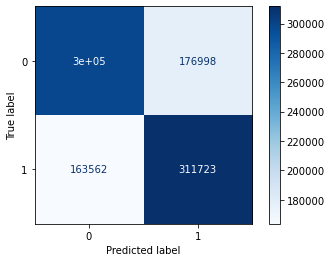

In [5]:
model = DecisionTreeClassifier().fit(train.drop("DESEMPENHO_BAIXO", 1), train["DESEMPENHO_BAIXO"])
predictions = model.predict(test.drop(["DESEMPENHO_BAIXO"], 1))
precision = precision_score(test["DESEMPENHO_BAIXO"] , predictions, average = "micro")
recall = recall_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary")
print("Precision: " + str(precision))
print("Recall: " + str(recall))
plot_confusion_matrix(model, test.drop(["DESEMPENHO_BAIXO"], 1), test["DESEMPENHO_BAIXO"], cmap = plt.cm.Blues)

### Finding the best parameters

In [27]:
grid = {'max_depth': [12, 15, 20],
               'min_samples_split': [200, 500, 1000, 2000, 3500, 5000],
               'min_samples_leaf': [20, 40, 60, 80, 150, 300, 500]
        }

rf = DecisionTreeClassifier()
rf_random = GridSearchCV(estimator = rf, param_grid = grid, cv = 3, n_jobs = -1)
rf_random.fit(train.drop("DESEMPENHO_BAIXO", 1), train["DESEMPENHO_BAIXO"])
rf_random.best_params_

{'max_depth': 15, 'min_samples_leaf': 40, 'min_samples_split': 2000}

Precision: 0.6965624243954264
Recall: 0.7509662623478545


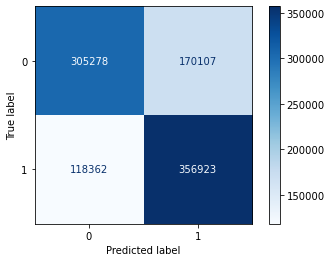

In [28]:
model = DecisionTreeClassifier(max_depth = 15, min_samples_split = 2000, min_samples_leaf = 40).fit(train.drop("DESEMPENHO_BAIXO", 1), train["DESEMPENHO_BAIXO"])
predictions = model.predict(test.drop(["DESEMPENHO_BAIXO"], 1))
precision = precision_score(test["DESEMPENHO_BAIXO"] , predictions, average = "micro")
recall = recall_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary")
print("Precision: " + str(precision))
print("Recall: " + str(recall))
plot_confusion_matrix(model, test.drop(["DESEMPENHO_BAIXO"], 1), test["DESEMPENHO_BAIXO"], cmap = plt.cm.Blues)

[Text(3282.2575899920885, 2633.0625, 'Renda_Mensal <= 3.5\ngini = 0.5\nsamples = 2218228\nvalue = [1109049, 1109179]\nclass = Acima_da_Media'),
 Text(1908.7778789324273, 2463.1875, 'Computador <= 0.5\ngini = 0.472\nsamples = 1445327\nvalue = [551500, 893827]\nclass = Acima_da_Media'),
 Text(1087.755491437081, 2293.3125, 'Escolaridade_Mae <= 3.5\ngini = 0.419\nsamples = 867223\nvalue = [259002, 608221]\nclass = Acima_da_Media'),
 Text(548.6087874627699, 2123.4375, 'Renda_Mensal <= 1.5\ngini = 0.366\nsamples = 443494\nvalue = [107148, 336346]\nclass = Acima_da_Media'),
 Text(278.34971844750555, 1953.5625, 'Pessoas_por_computador <= 39.5\ngini = 0.33\nsamples = 278389\nvalue = [58099, 220290]\nclass = Acima_da_Media'),
 Text(126.72375279225614, 1783.6875, 'TP_LINGUA <= 0.5\ngini = 0.292\nsamples = 139441\nvalue = [24768, 114673]\nclass = Acima_da_Media'),
 Text(67.25707371556217, 1613.8125, 'Ocupacao_Pai <= 1.5\ngini = 0.334\nsamples = 38156\nvalue = [8071, 30085]\nclass = Acima_da_Media'

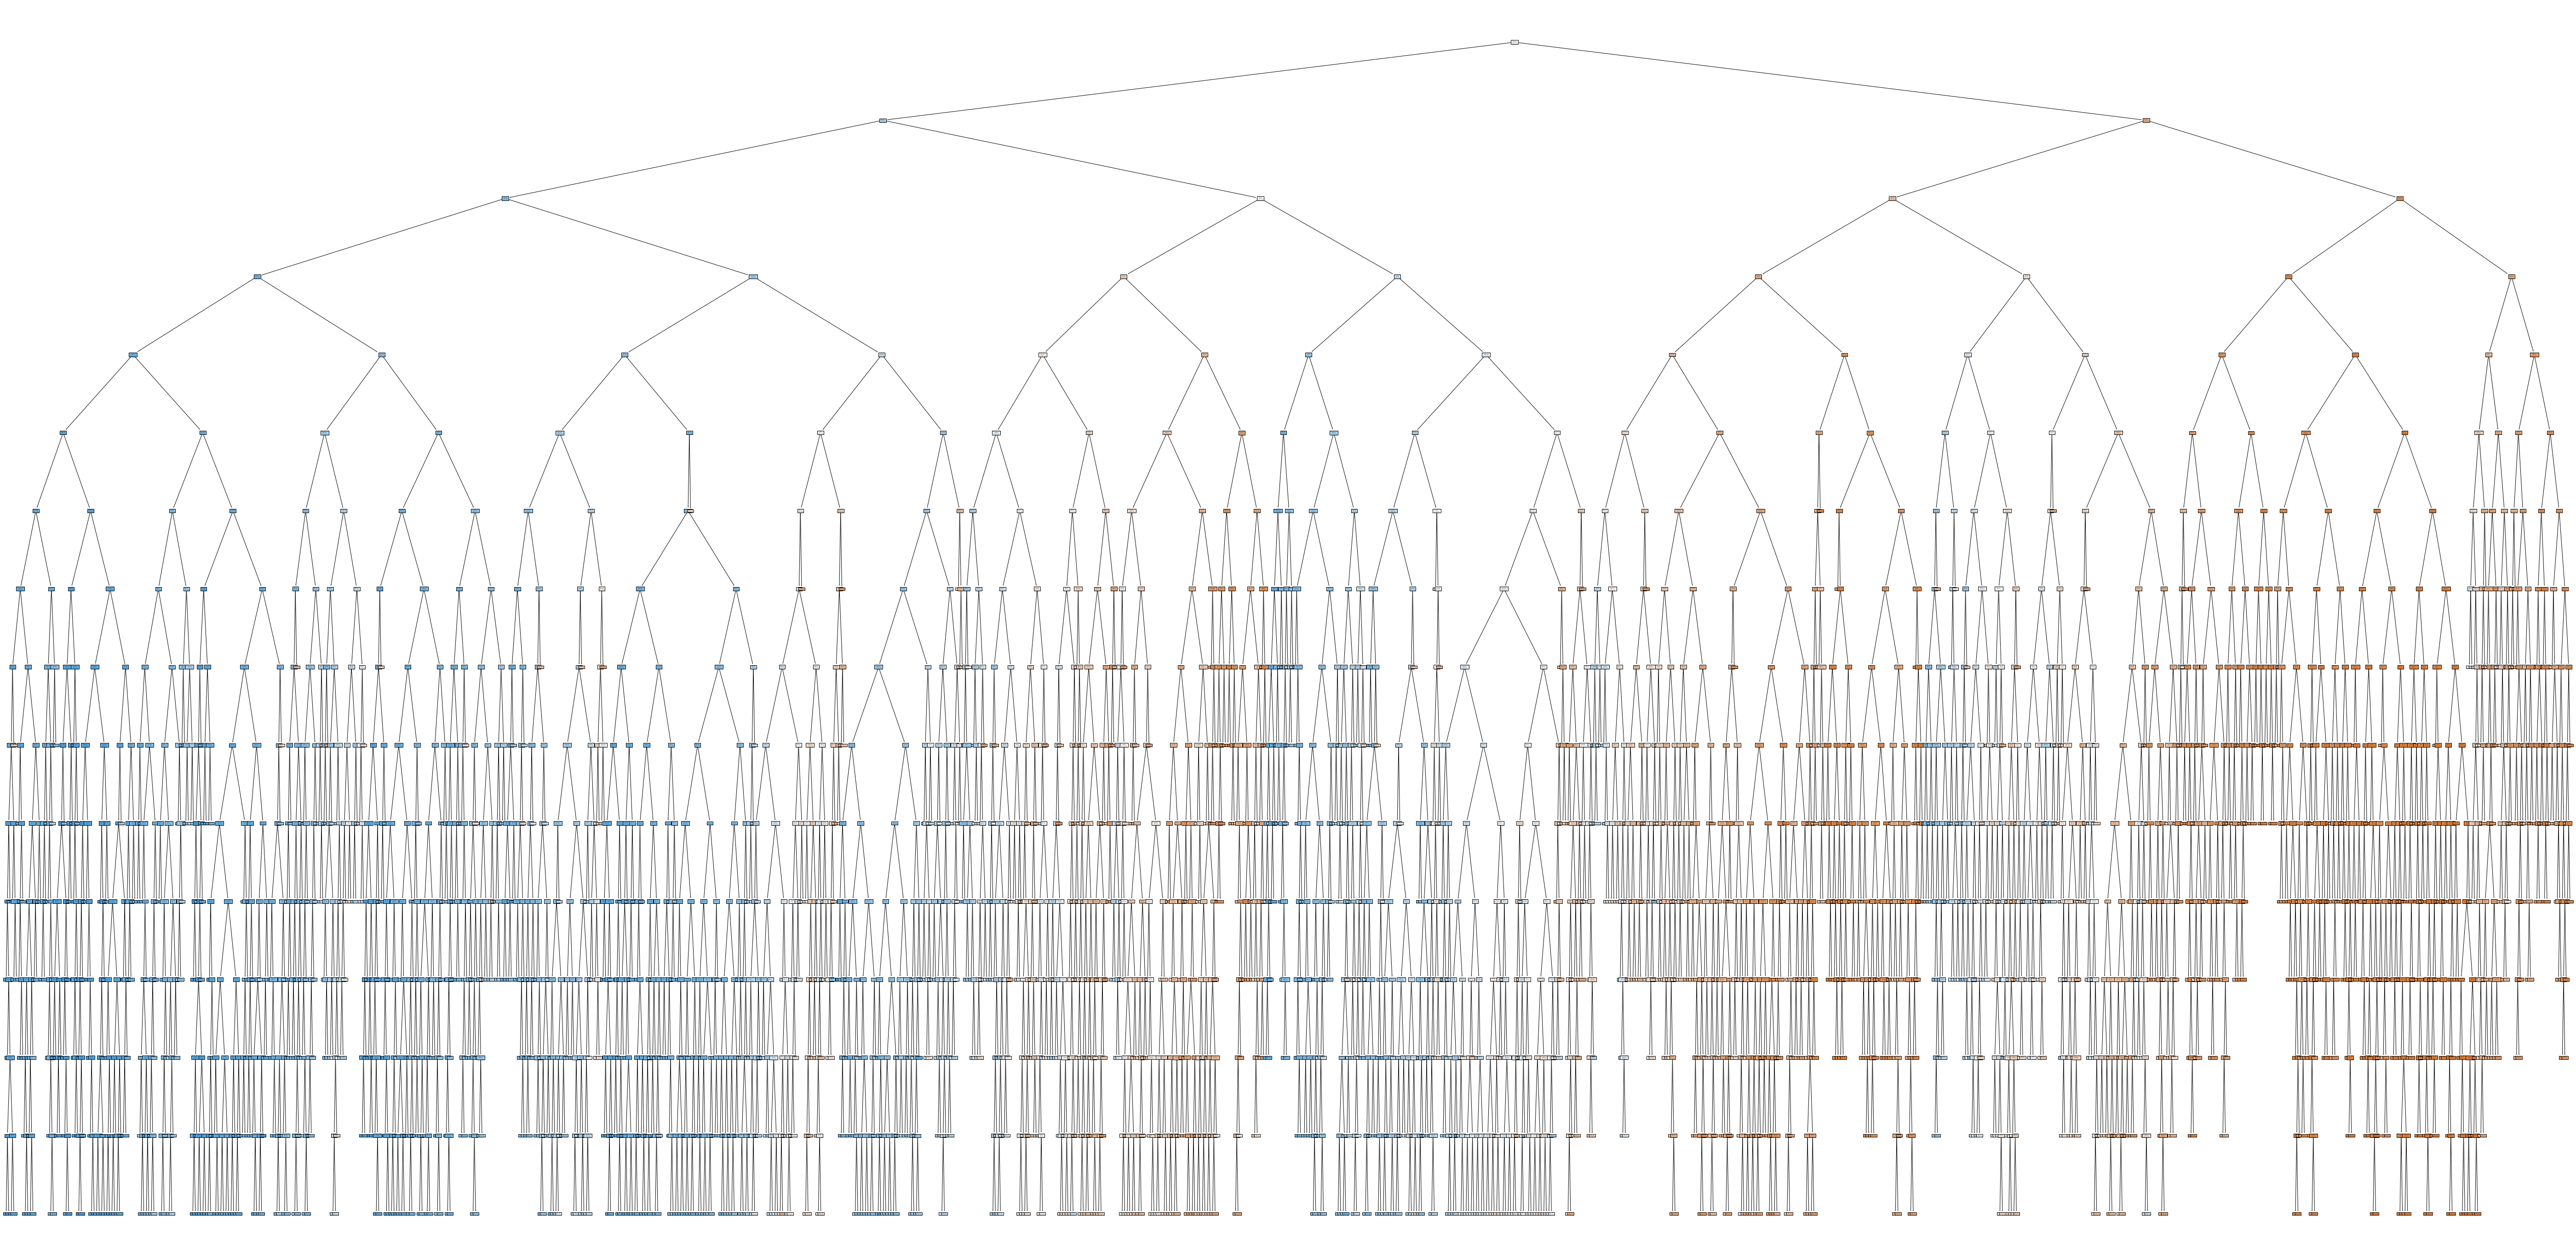

In [26]:
plt.figure(figsize=(100,50))
tree.plot_tree(model, feature_names=data.columns, class_names= ["Abaixo_da_Media", "Acima_da_Media"],
                filled=True)

## Saving data

In [15]:
data.to_csv("../dataset/dataset_4.csv", sep = ";")